# Quick start1 -Simple usage-

This module estimates the density ratio $r(x) = p(x) / q(x)$ from $x1$ and $x2$ samples generated from two unknown distributions $p(x), q(x)$, respectively, where $x1$ and $x2$ are d-dimensional real numbers.   

### Generate data

For example,

Generate two samples that follow the normal distribution of $\mathcal{N(0,1)}$ and $\mathcal{N(1,2)}$, respectively.

In [1]:
#from src import densityratio
import densityratio
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

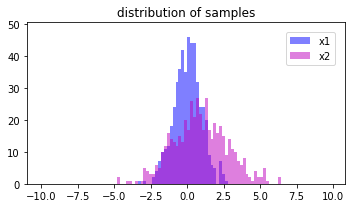

In [2]:
m = [0.,1]
s = [1.0,2.0]
np.random.seed(10)
x1 = np.random.normal(loc= m[0], scale = s[0], size = 500)
x2 = np.random.normal(loc= m[1], scale = s[1], size = 500)

# 表示
fig = plt.figure(figsize=[5,3])
ax = fig.add_subplot(111)
ax.set_title('distribution of samples')
edges = np.arange(-10,10,0.2)
a = ax.hist(x1, bins = edges, color='b', alpha = 0.5, label='x1')
b = ax.hist(x2, bins = edges, color='m', alpha = 0.5, label='x2')
ylim = 1.1*np.max([a[0],b[0]])
ax.set_ylim(0,ylim)
ax.legend(fontsize = 10, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 1)
plt.tight_layout()
fig.savefig('pic/QS1_samples.png')

### Estimate densityratio

The densityratio provides a *densratio()* class that returns an object with a function for estimating the density ratio and a method for getting the parameters of the density ratio estimation.

Pass two samples to the densratio and it will be calculated automatically.

In [3]:
dens = densityratio.Densratio(x1,x2)

AttributeError: module 'densityratio' has no attribute 'Densratio'

### Compare the true with the estimated.

In this case, the true density ratio $r(x)$ is known, so we can compare $r(x)$ with the estimated density ratio $\hat{r}(x)$.    
The code below gives the following output:

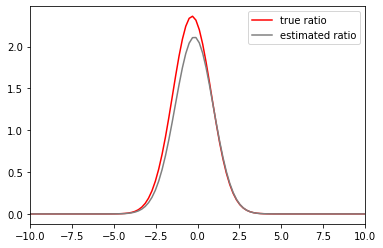

In [4]:
x = np.linspace(-10,10,100)
x1_pdf = lambda x: scipy.stats.norm.pdf(x,loc=m[0],scale=s[0])
x2_pdf = lambda x: scipy.stats.norm.pdf(x,loc=m[1],scale=s[1])
r = lambda x: x1_pdf(x)/x2_pdf(x)

plt.figure()
plt.plot(x,r(x),'r',label='true ratio')
plt.plot(x,dens(x),'gray',label='estimated ratio')
plt.xlim(-10,10)
plt.legend()
plt.savefig('pic/QS1_ratio.png')

To get the parameters used for the density ratio calculation, call the following method.

In [5]:
print('lambda=',dens.lambda_)
print('sigma=',dens.sigma)
print('KLdiv=',dens.KLDiv)

lambda= 1.0
sigma= 1.0
KLdiv= 0.38509275664405945
